# Single cell RNA-sequencing reveals cellular heterogeneity and trajectories of lineage specification during murine embryonic limb development.
Natalie HK, Nguyen PTH, Farshid G, Matrix Biol., 2019. PMID: [31874220](https://www.ncbi.nlm.nih.gov/pubmed/31874220)

## Loading in packages<a id="0"></a>

In [1]:
suppressPackageStartupMessages({
    library(DropletUtils)
    library(SingleCellExperiment)
    library(scuttle)
    library(Seurat)
    library(SeuratWrappers)
    library(stringr)
    library(dplyr)
    library(data.table)
    library(Matrix)
    library(patchwork)
    library(ggplot2)
    #library(Nebulosa)
})

options(repr.plot.width = 16, repr.plot.height = 8)

## Loading in data and creating a Seurat object <a id="1"></a>

The dataset was downloaden manually from Gene Expression Omnibus. (**GSE142425**)

[Link to datasets](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE142425)

In [2]:
E11_5.data <- Read10X(
    data.dir='./RNAseqdata/E11_5/',
    unique.features = TRUE,
    strip.suffix = FALSE)
E11_5 <- CreateSeuratObject(counts = E11_5.data)

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [17]:
E13_5.data <- Read10X(
    data.dir='./RNAseqdata/E13_5/',
    unique.features = TRUE,
    strip.suffix = FALSE)
E13_5 <- CreateSeuratObject(counts = E13_5.data)

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [3]:
sce <- as.SingleCellExperiment(E13_5)

In [4]:
sce

class: SingleCellExperiment 
dim: 33456 2884 
metadata(0):
assays(2): counts logcounts
rownames(33456): Gm26206 Xkr4 ... Vmn2r122 Cd99
rowData names(0):
colnames(2884): AAACCTGAGTTAGGTA-1 AAACCTGCAAAGCAAT-1 ...
  TTTGTCACACAGGTTT-1 TTTGTCATCAAGGTAA-1
colData names(4): orig.ident nCount_RNA nFeature_RNA ident
reducedDimNames(0):
mainExpName: RNA
altExpNames(0):

In [7]:
sce@assays

An object of class "SimpleAssays"
Slot "data":
List of length 2
names(2): counts logcounts


In [4]:
E15_5.data <- Read10X(
    data.dir='./RNAseqdata/E15_5/',
    unique.features = TRUE,
    strip.suffix = FALSE)
E15_5 <- CreateSeuratObject(counts = E15_5.data)

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [5]:
E18_5.data <- Read10X(
    data.dir='./RNAseqdata/E18_5/',
    unique.features = TRUE,
    strip.suffix = FALSE)
E18_5 <- CreateSeuratObject(counts = E18_5.data)

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [6]:
dim(E11_5)
dim(E13_5)
dim(E15_5)
dim(E18_5)

[1] 33456  2683

[1] 33456  2884

[1] 33456  2708

[1] 33456  1997

## Add metadata<a id="2"></a>

In [ ]:
dir.create("./metadata")

url <- "https://ftp.ncbi.nlm.nih.gov/geo/series/GSE142nnn/GSE142425/matrix/GSE142425_series_matrix.txt.gz"
destfile <- "./metadata/GSE142425_series_matrix.txt.gz"

download.file(url, destfile, method = "curl", quiet = FALSE)

In [3]:
lines <- readLines("./Guilak/metadata/GSE142425_series_matrix.txt.gz")

# keep only sample data, drop series info
sampledata <- lines[which(grepl("!Sample", lines))]
write.table(sampledata, file = "./Guilak/metadata/sampledata.txt", sep = "\t", quote = FALSE, row.names = FALSE, col.names = FALSE) #save

# load and transpose
sampledata <- as.data.frame(t(fread("./Guilak/metadata/sampledata.txt", sep = "\t")))

# set header
names(sampledata) <- as.matrix(sampledata[1, ])
sampledata <- sampledata[-1, ]
sampledata[] <- lapply(sampledata, function(x) type.convert(as.character(x), as.is = FALSE))
rownames(sampledata) <- sampledata$`!Sample_geo_accession` # give samples a meaningful label that allows quick lookup if/when neeeded

In [4]:
head(sampledata)

,!Sample_geo_accession,!Sample_status,!Sample_submission_date,!Sample_last_update_date,!Sample_type,!Sample_channel_count,!Sample_source_name_ch1,!Sample_organism_ch1,!Sample_characteristics_ch1,!Sample_characteristics_ch1.1,⋯,!Sample_data_row_count,!Sample_instrument_model,!Sample_library_selection,!Sample_library_source,!Sample_library_strategy,!Sample_relation,!Sample_relation.1,!Sample_supplementary_file_1,!Sample_supplementary_file_2,!Sample_supplementary_file_3
,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,⋯,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
GSM4227224,GSM4227224,Public on Dec 21 2019,Dec 20 2019,Dec 22 2019,SRA,1,hindlimb,Mus musculus,strain: C57BL/6,developmental stage: embryonic day 11.5,⋯,0,Illumina NovaSeq 6000,cDNA,transcriptomic,RNA-Seq,BioSample: https://www.ncbi.nlm.nih.gov/biosample/SAMN13653645,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX7421171,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM4227nnn/GSM4227224/suppl/GSM4227224_E11barcodes.tsv.gz,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM4227nnn/GSM4227224/suppl/GSM4227224_E11genes.tsv.gz,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM4227nnn/GSM4227224/suppl/GSM4227224_E11matrix.mtx.gz
GSM4227225,GSM4227225,Public on Dec 21 2019,Dec 20 2019,Dec 22 2019,SRA,1,hindlimb,Mus musculus,strain: C57BL/6,developmental stage: embryonic day 13.5,⋯,0,Illumina NovaSeq 6000,cDNA,transcriptomic,RNA-Seq,BioSample: https://www.ncbi.nlm.nih.gov/biosample/SAMN13653635,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX7421172,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM4227nnn/GSM4227225/suppl/GSM4227225_E13barcodes.tsv.gz,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM4227nnn/GSM4227225/suppl/GSM4227225_E13genes.tsv.gz,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM4227nnn/GSM4227225/suppl/GSM4227225_E13matrix.mtx.gz
GSM4227226,GSM4227226,Public on Dec 21 2019,Dec 20 2019,Dec 22 2019,SRA,1,hindlimb,Mus musculus,strain: C57BL/6,developmental stage: embryonic day 15.5,⋯,0,Illumina NovaSeq 6000,cDNA,transcriptomic,RNA-Seq,BioSample: https://www.ncbi.nlm.nih.gov/biosample/SAMN13653610,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX7421173,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM4227nnn/GSM4227226/suppl/GSM4227226_E15barcodes.tsv.gz,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM4227nnn/GSM4227226/suppl/GSM4227226_E15genes.tsv.gz,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM4227nnn/GSM4227226/suppl/GSM4227226_E15matrix.mtx.gz
GSM4227227,GSM4227227,Public on Dec 21 2019,Dec 20 2019,Dec 22 2019,SRA,1,hindlimb,Mus musculus,strain: C57BL/6,developmental stage: embryonic day 18.5,⋯,0,Illumina NovaSeq 6000,cDNA,transcriptomic,RNA-Seq,BioSample: https://www.ncbi.nlm.nih.gov/biosample/SAMN13653580,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX7421174,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM4227nnn/GSM4227227/suppl/GSM4227227_E18barcodes.tsv.gz,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM4227nnn/GSM4227227/suppl/GSM4227227_E18genes.tsv.gz,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM4227nnn/GSM4227227/suppl/GSM4227227_E18matrix.mtx.gz


In [5]:
colnames(sampledata) <- c('geo_accession','status','submission_date','last_update_date','type','channel_count','tissue','organism','strain','developmental_stage','characteristics_ch1','molecule_ch1','extract_protocol_ch1','extract_protocol_ch1','taxid_ch1','data_processing','data_processing','data_processing','data_processing','data_processing','data_processing','platform_id','contact_name','contact_email','institute','contact_address','contact_city','contact_state','contact_zip/postal_code','country','row_count','instrument_model','library_selection','library_source','library_strategy','relation','relation','supplementary_file_1','supplementary_file_2','supplementary_file_3')

In [6]:
colnames(sampledata)

[1] "geo_accession"           "status"                 
 [3] "submission_date"         "last_update_date"       
 [5] "type"                    "channel_count"          
 [7] "tissue"                  "organism"               
 [9] "strain"                  "developmental_stage"    
[11] "characteristics_ch1"     "molecule_ch1"           
[13] "extract_protocol_ch1"    "extract_protocol_ch1"   
[15] "taxid_ch1"               "data_processing"        
[17] "data_processing"         "data_processing"        
[19] "data_processing"         "data_processing"        
[21] "data_processing"         "platform_id"            
[23] "contact_name"            "contact_email"          
[25] "institute"               "contact_address"        
[27] "contact_city"            "contact_state"          
[29] "contact_zip/postal_code" "country"                
[31] "row_count"               "instrument_model"       
[33] "library_selection"       "library_source"         
[35] "library_strategy"        "relation"               
[37] "relation"                "supplementary_file_1"   
[39] "supplementary_file_2"    "supplementary_file_3"

In [7]:
meta <- sampledata[,c("geo_accession", "tissue", "organism", "strain", "developmental_stage", "instrument_model"),]
colnames(meta) <- c("geo_accession", "tissue", "organism", "strain", "developmental_stage", "instrument_model")

meta$technology <- "10x 3' v2"   

rownames(meta) <- meta$Sample_Name
head(meta)

,geo_accession,tissue,organism,strain,developmental_stage,instrument_model,technology
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<chr>
1,GSM4227224,hindlimb,Mus musculus,strain: C57BL/6,developmental stage: embryonic day 11.5,Illumina NovaSeq 6000,10x 3' v2
2,GSM4227225,hindlimb,Mus musculus,strain: C57BL/6,developmental stage: embryonic day 13.5,Illumina NovaSeq 6000,10x 3' v2
3,GSM4227226,hindlimb,Mus musculus,strain: C57BL/6,developmental stage: embryonic day 15.5,Illumina NovaSeq 6000,10x 3' v2
4,GSM4227227,hindlimb,Mus musculus,strain: C57BL/6,developmental stage: embryonic day 18.5,Illumina NovaSeq 6000,10x 3' v2


In [13]:
meta_E11_5 <- (meta[1,] %>% slice(rep(1:n(), each = nrow(E11_5@meta.data))))
rownames(meta_E11_5) <- rownames(E11_5@meta.data)

E11_5 <- AddMetaData(E11_5, meta_E11_5)
rm(meta_E11_5)

In [8]:
meta_E13_5 <- (meta[2,] %>% slice(rep(1:n(), each = nrow(E13_5@meta.data))))
rownames(meta_E13_5) <- rownames(E13_5@meta.data)

E13_5 <- AddMetaData(E13_5, meta_E13_5)
rm(meta_E13_5)

In [15]:
meta_E15_5 <- (meta[3,] %>% slice(rep(1:n(), each = nrow(E15_5@meta.data))))
rownames(meta_E15_5) <- rownames(E15_5@meta.data)

E15_5 <- AddMetaData(E15_5, meta_E15_5)
rm(meta_E15_5)

In [16]:
meta_E18_5 <- (meta[4,] %>% slice(rep(1:n(), each = nrow(E18_5@meta.data))))
rownames(meta_E18_5) <- rownames(E18_5@meta.data)

E18_5 <- AddMetaData(E18_5, meta_E18_5)
rm(meta_E18_5)

In [10]:
saveRDS(E13_5, file = "./Guilak/RDataSessions/E13_5_SeuratObject_raw.Rds")

## Quality control<a id="3"></a>


**QC of the cells by feature number and library size**

Low-quality cells need to be removed to ensure that technical effects do not distort downstream analysis results. To obtain threshold, we assume that most of the dataset consists of high-quality cells. We remove cells with log-library sizes that deviate more than 3 absolute deviations from the median (Lun et al. 2016, Davie et al., 2018). The log transformation is performed to improve resolution at small values, which is especially necessary when the absolute deviation of the raw values is comparable to or greater than the median.

**Proportion of mitochondrial reads**
Another measure of quality is the proportion of reads mapped to genes in the mitochondrial genome. High proportions are indicative of poor quality cells (Ilicic et al., 2016), possibly because of increased apoptosis and/or loss of cytoplasmic RNA from lysed cells. In addition, a high proportion of mitochondrial reads could reflect an inefficient capture of the RNA when creating the library. By assuming most cells in the dataset are of high quality, the threshold to remove cells with too high mitochondrial proportions can be set to remove any large outliers. For this, the median absolute deviation method is used again.

### Timepoint E11_5<a id="4"></a>

#### Convert Seurat object to single cell object

In [17]:
sce <- as.SingleCellExperiment(E11_5)

In [18]:
is.mito <- grepl("^mt-", rownames(sce))
mito.list <-  grep("^mt-", rownames(sce), value = TRUE)

In [19]:
is.spike <- grepl("^gSpikein", rownames(sce))
spike.list <- grep("^gSpikein", rownames(sce), value = TRUE)

In [20]:
celldata <- perCellQCMetrics(sce, subsets = list(Mt = is.mito, ERCC = is.spike))

In [21]:
sce <- addPerCellQC(sce, subsets=list(Mito = is.mito, ERCC = is.spike))
colnames(colData(sce))

[1] "orig.ident"            "nCount_RNA"            "nFeature_RNA"         
 [4] "geo_accession"         "tissue"                "organism"             
 [7] "strain"                "developmental_stage"   "instrument_model"     
[10] "technology"            "ident"                 "sum"                  
[13] "detected"              "subsets_Mito_sum"      "subsets_Mito_detected"
[16] "subsets_Mito_percent"  "subsets_ERCC_sum"      "subsets_ERCC_detected"
[19] "subsets_ERCC_percent"  "total"

**QC of the cells by feature number and library size**

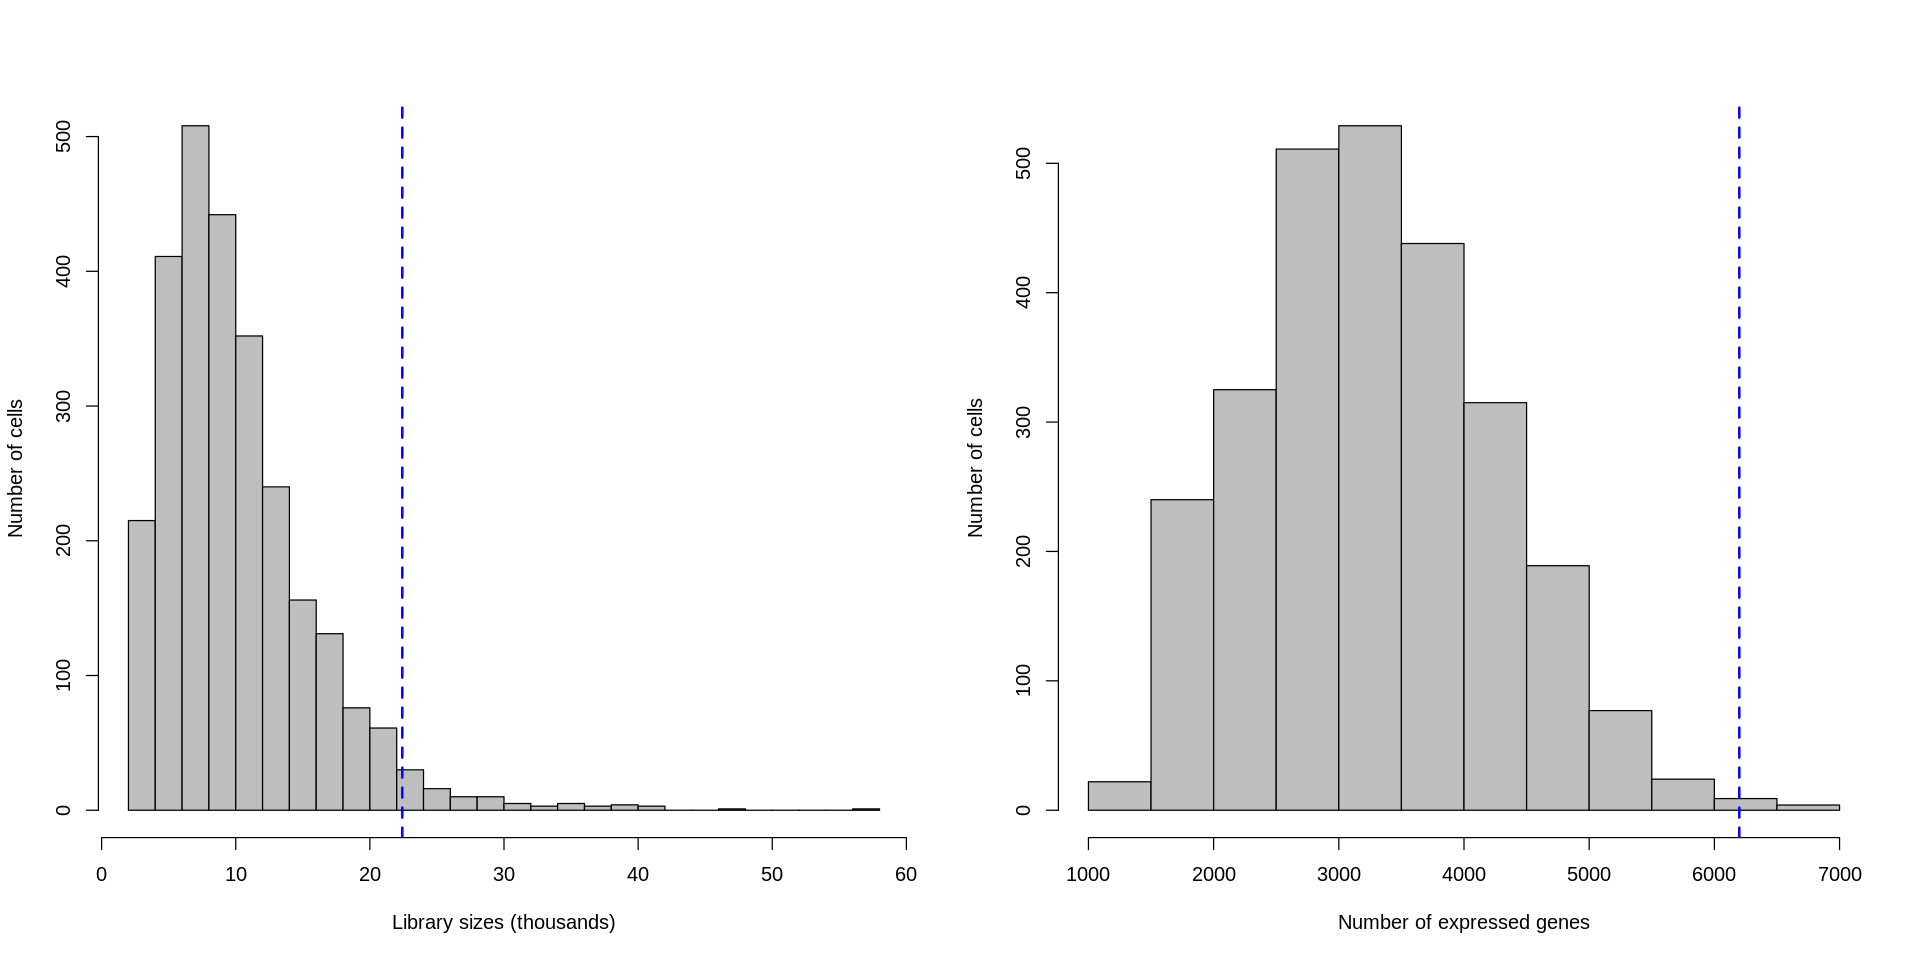

In [22]:
libsize.drop <- isOutlier(sce$sum, nmads = 3, type = "both", log = TRUE)
feature.drop <- isOutlier(sce$detected, nmads = 3, type = "both", log = TRUE)

# libsize.drop cutoff values
min.libsize <- (median(sce$sum) - 3*mad(sce$sum))/1e3
max.libsize <- (median(sce$sum) + 3*mad(sce$sum))/1e3

# feature.drop cutoff values
min.features <- (median(sce$detected) - 3*mad(sce$detected))
max.features <- (median(sce$detected) + 3*mad(sce$detected))

par(mfrow = c(1,2))

hist(sce$sum/1e3, xlab = "Library sizes (thousands)", main = "", breaks = 20,
     col = "grey", ylab = "Number of cells")

abline(v = min.libsize, col = "blue", lwd = 2, lty = 2)
abline(v = max.libsize, col = "blue", lwd = 2, lty = 2)

hist(sce$detected, xlab = "Number of expressed genes", main = "", breaks = 20,
     col = "grey", ylab = "Number of cells")

abline(v = min.features, col = "blue", lwd = 2, lty = 2)
abline(v = max.features, col = "blue", lwd = 2, lty = 2)

**Proportion of mitochondrial reads**

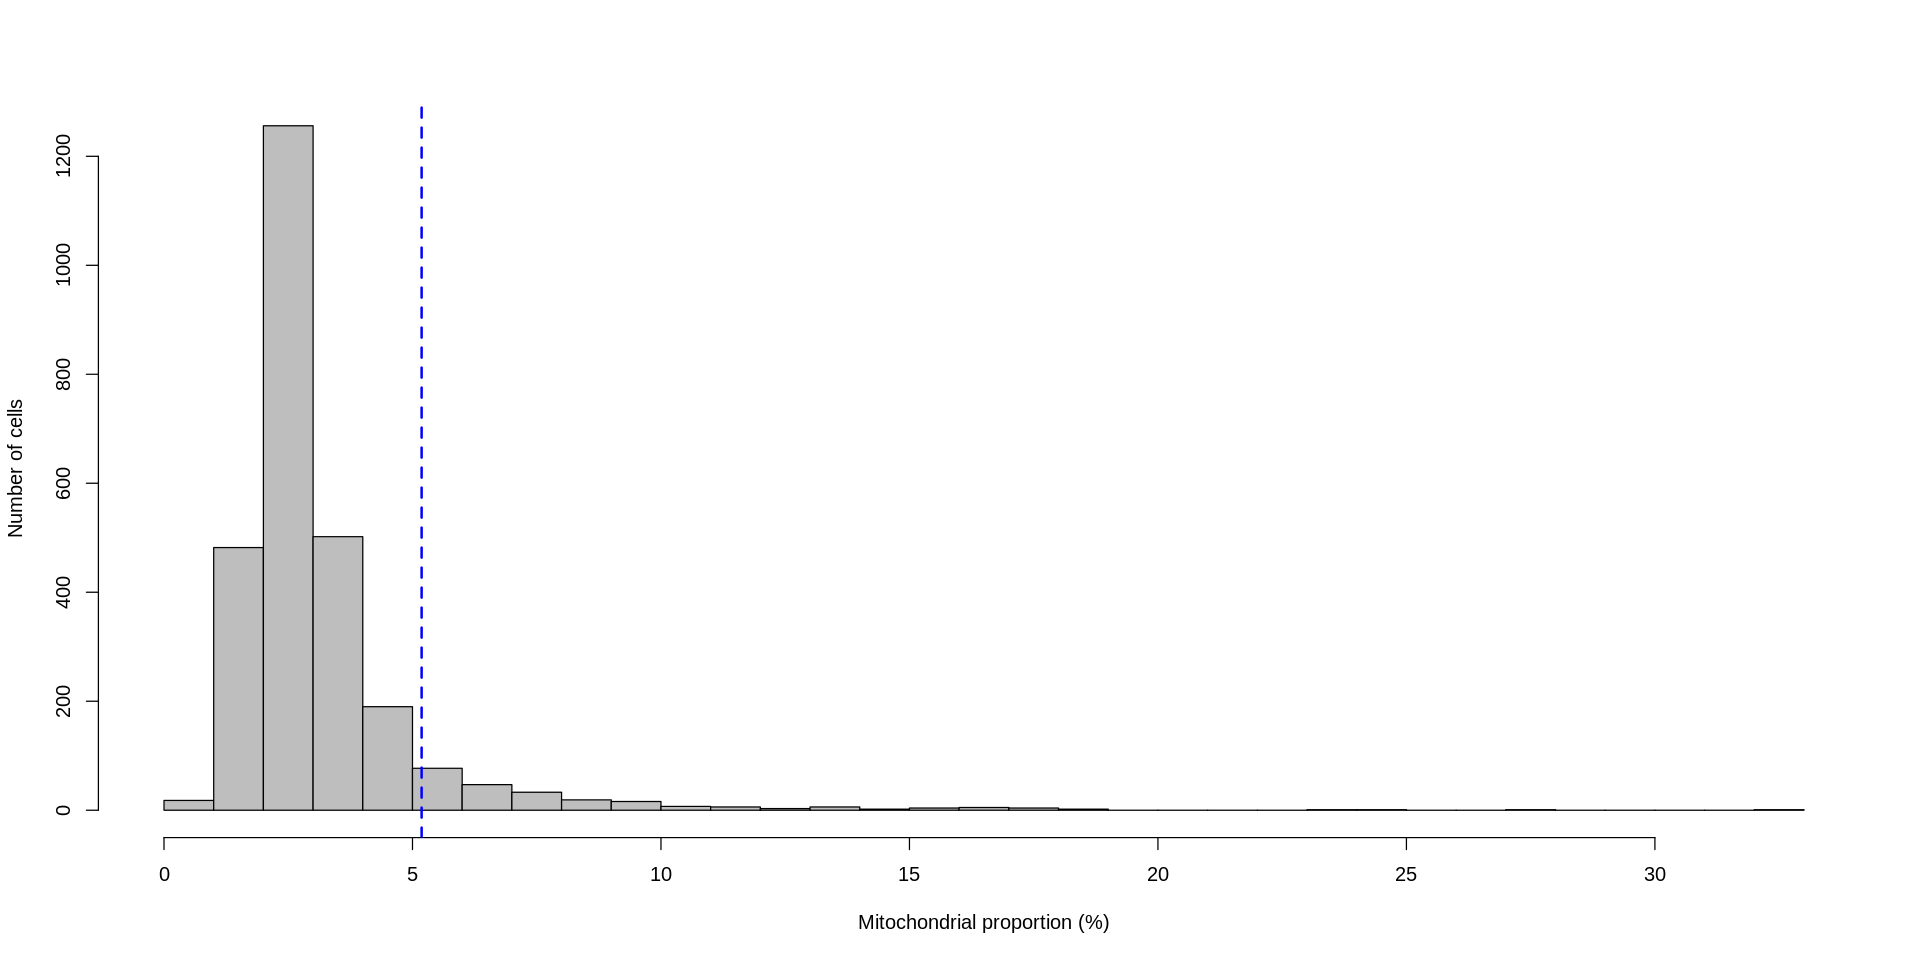

In [23]:
mito.drop <- isOutlier(sce$subsets_Mito_percent, nmads = 3)

max.mito <- median(sce$subsets_Mito_percent) + 3*mad(sce$subsets_Mito_percent)

hist(sce$subsets_Mito_percent, xlab = "Mitochondrial proportion (%)",
     ylab = "Number of cells",
     breaks = 40, main = "", col = "grey")

abline(v = max.mito, col = "blue", lwd = 2, lty = 2)

In [24]:
sceQC <- sce[,!(libsize.drop | feature.drop | mito.drop)]
data.frame(ByLibrarySize = sum(libsize.drop), ByFeature = sum(feature.drop), ByMito = sum(mito.drop),
           Remaining = ncol(sceQC))

ByLibrarySize,ByFeature,ByMito,Remaining
<int>,<int>,<int>,<int>
2,2,228,2453


**Filtering out low-abundance genes**

Low-abundance genes are problematic as zero or near-zero counts do not contain enough information for
reliable statsitical inference. Here, low-abundance genes are defined as those with an average count below a
filter threshold of 0.001 (Davie et al., 2018). Removal of these genes mitigates discreteness and reduces the
amount of computational work without major (if any) loss of information.

In [25]:
average.counts <- calculateAverage(sceQC, exprs_values = "counts",
                                   subset_row = NULL)
genes.to.keep <- average.counts >= 0.001
sum(genes.to.keep)

[1] 17008

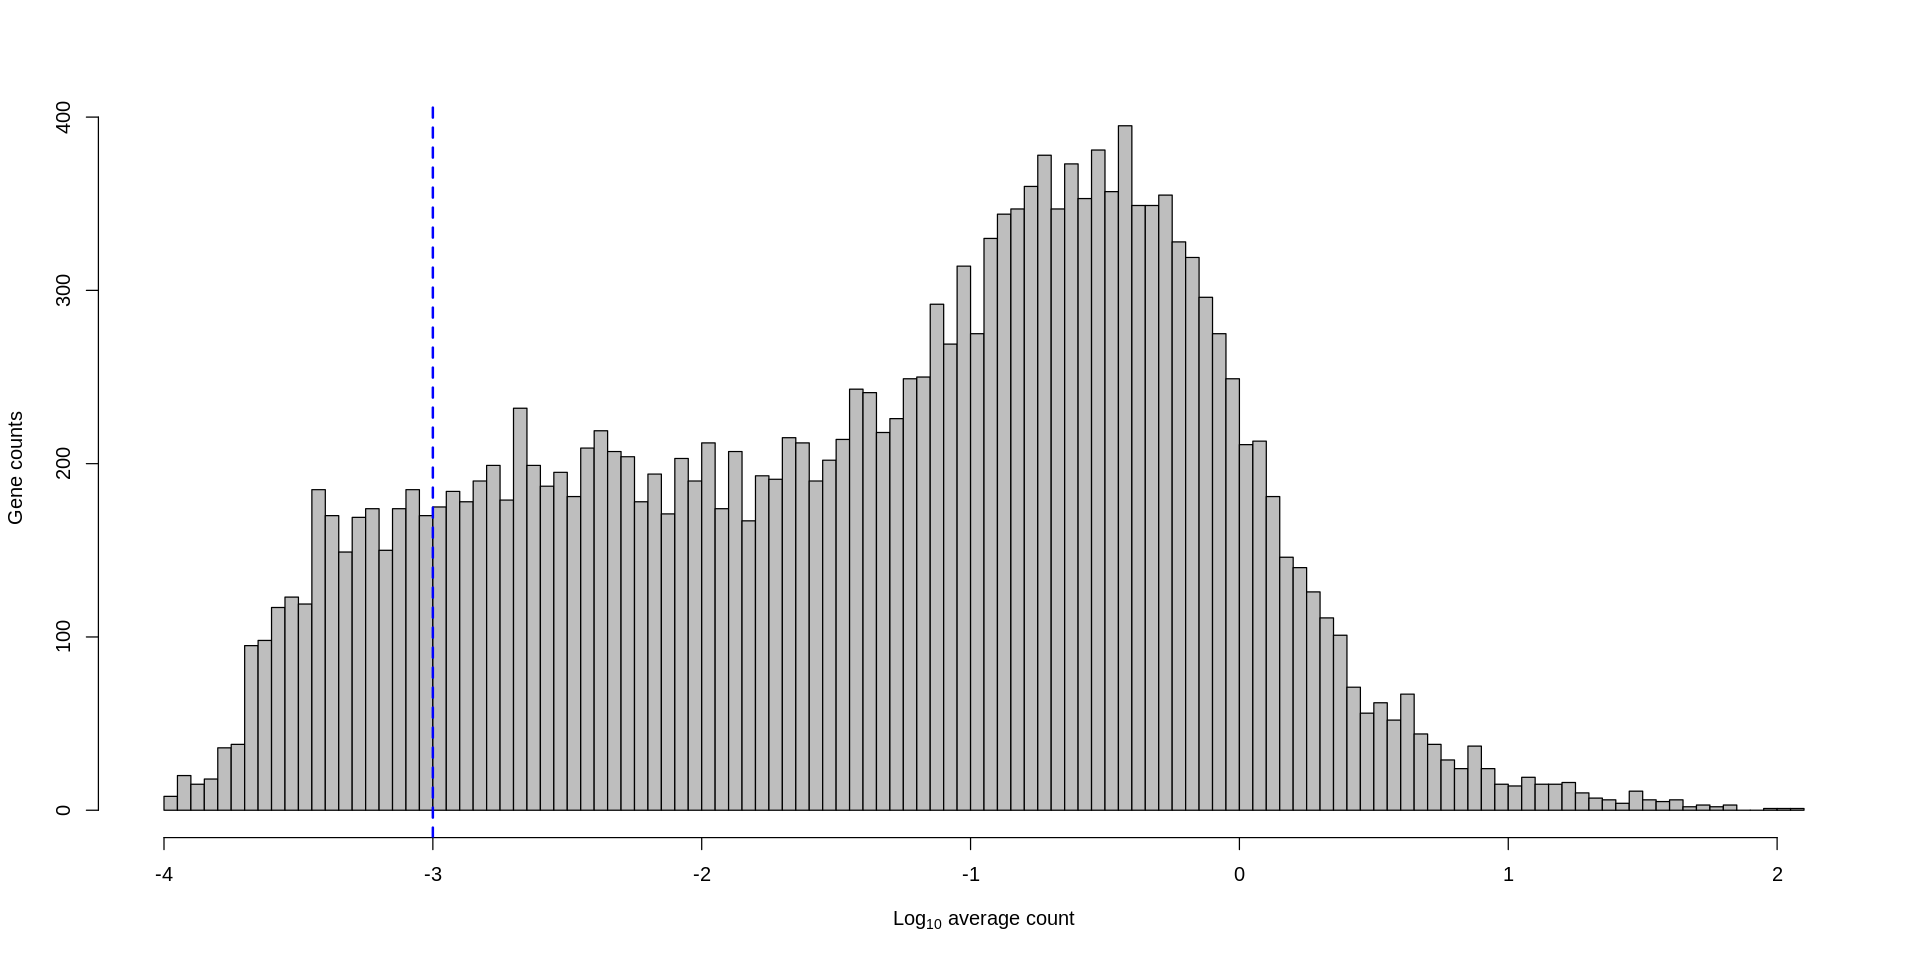

In [26]:
hist(log10(average.counts), breaks = 100, main = "", col = "grey",
     xlab = expression(Log[10]~"average count"), ylab = "Gene counts")
abline(v = log10(0.001), col = "blue", lwd = 2, lty = 2)

Apply the mean-based filter to the data by subsetting the `SingleCellExperiment` object.

In [27]:
sce <- sceQC[genes.to.keep,]
dim(sce)

[1] 17008  2453

**Duplicate removal**

In [28]:
sce <- sce[!duplicated(rownames(sce)),]
dim(sce)

[1] 17008  2453

#### Convert single cell object to Seurat object

In [29]:
seuratObject <- as.Seurat(sce)
seuratObject

An object of class Seurat 
17008 features across 2453 samples within 1 assay 
Active assay: RNA (17008 features, 0 variable features)

In [30]:
dir.create("./RDataSessions")

In [31]:
saveRDS(seuratObject, file = "./RDataSessions/E11_5_SeuratObject.Rds")

### Timepoint E13_5<a id="5"></a>

#### Convert Seurat object to single cell object

In [27]:
sce <- as.SingleCellExperiment(E13_5)

In [28]:
is.mito <- grepl("^mt-", rownames(sce))
mito.list <-  grep("^mt-", rownames(sce), value = TRUE)

In [29]:
is.spike <- grepl("^gSpikein", rownames(sce))
spike.list <- grep("^gSpikein", rownames(sce), value = TRUE)

In [30]:
celldata <- perCellQCMetrics(sce, subsets = list(Mt = is.mito, ERCC = is.spike))

In [31]:
sce <- addPerCellQC(sce, subsets=list(Mito = is.mito, ERCC = is.spike))
colnames(colData(sce))

[1] "orig.ident"            "nCount_RNA"            "nFeature_RNA"         
 [4] "ident"                 "sum"                   "detected"             
 [7] "subsets_Mito_sum"      "subsets_Mito_detected" "subsets_Mito_percent" 
[10] "subsets_ERCC_sum"      "subsets_ERCC_detected" "subsets_ERCC_percent" 
[13] "total"

**QC of the cells by feature number and library size**

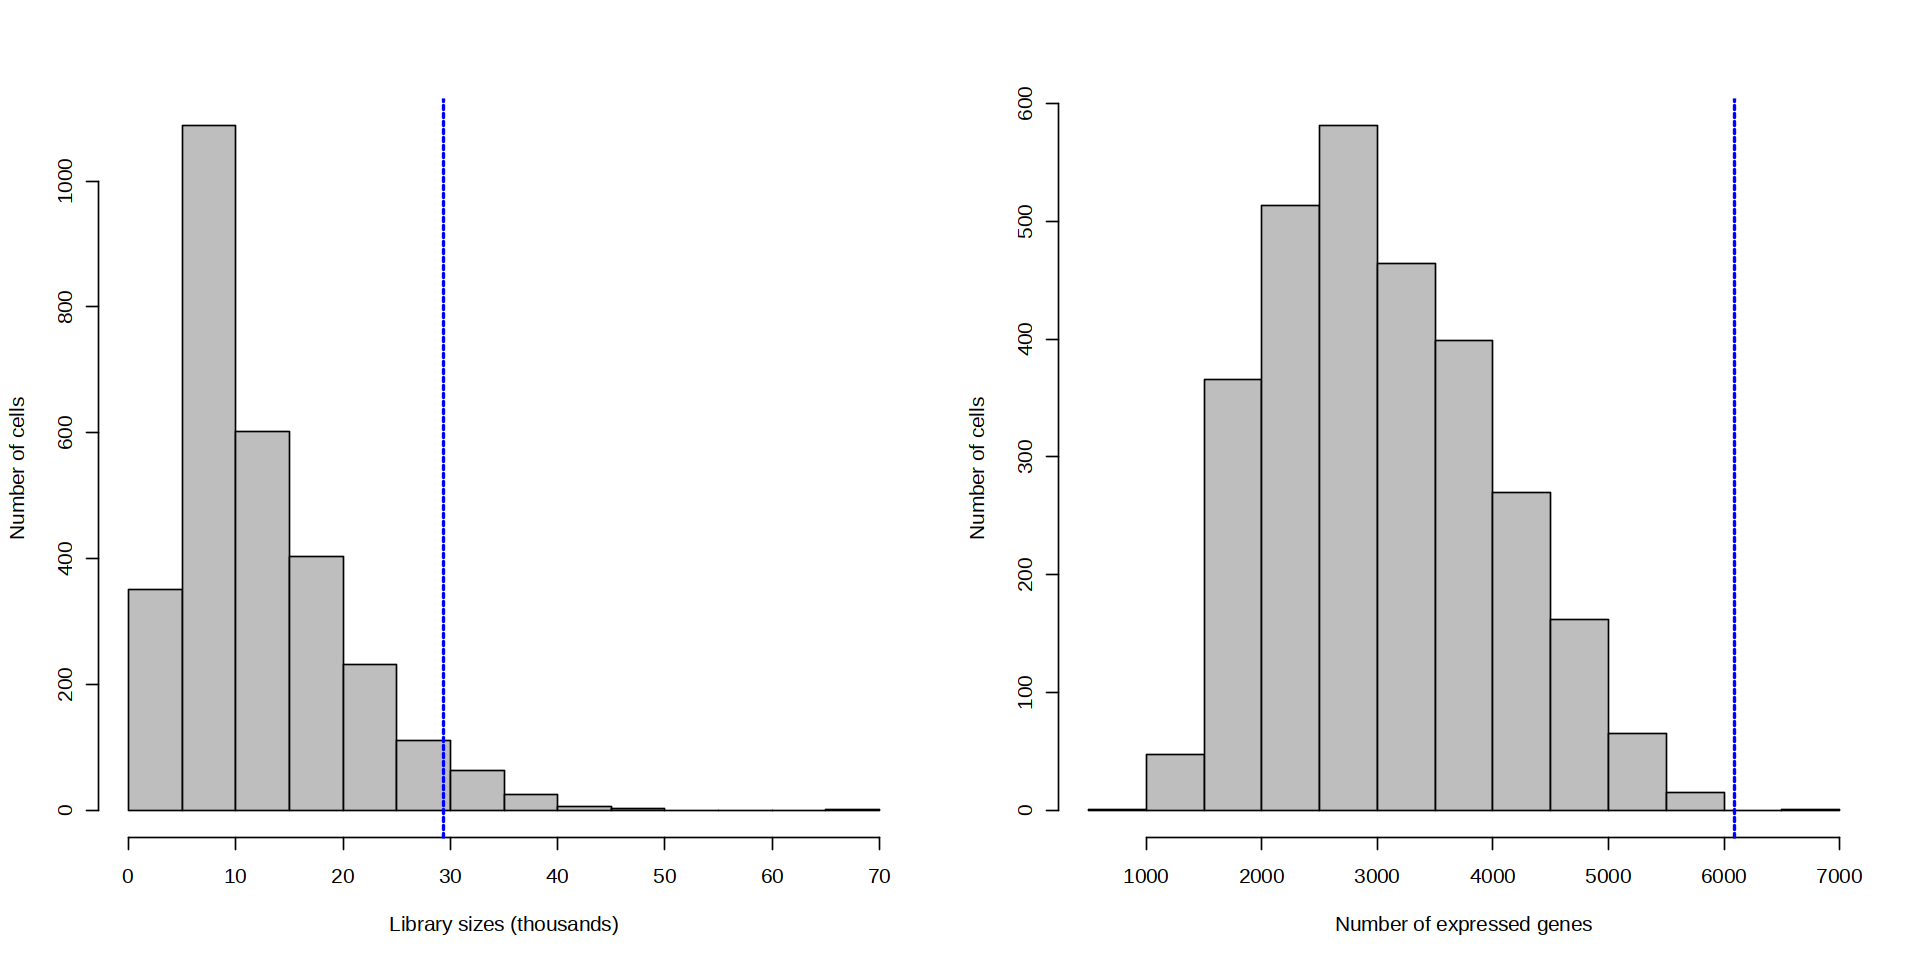

In [32]:
libsize.drop <- isOutlier(sce$sum, nmads = 3, type = "both", log = FALSE)
feature.drop <- isOutlier(sce$detected, nmads = 3, type = "both", log = FALSE)

# libsize.drop cutoff values
min.libsize <- (median(sce$sum) - 3*mad(sce$sum))/1e3
max.libsize <- (median(sce$sum) + 3*mad(sce$sum))/1e3

# feature.drop cutoff values
min.features <- (median(sce$detected) - 3*mad(sce$detected))
max.features <- (median(sce$detected) + 3*mad(sce$detected))

par(mfrow = c(1,2))

hist(sce$sum/1e3, xlab = "Library sizes (thousands)", main = "", breaks = 20,
     col = "grey", ylab = "Number of cells")

abline(v = min.libsize, col = "blue", lwd = 2, lty = 2)
abline(v = max.libsize, col = "blue", lwd = 2, lty = 2)

hist(sce$detected, xlab = "Number of expressed genes", main = "", breaks = 20,
     col = "grey", ylab = "Number of cells")

abline(v = min.features, col = "blue", lwd = 2, lty = 2)
abline(v = max.features, col = "blue", lwd = 2, lty = 2)

**Proportion of mitochondrial reads**

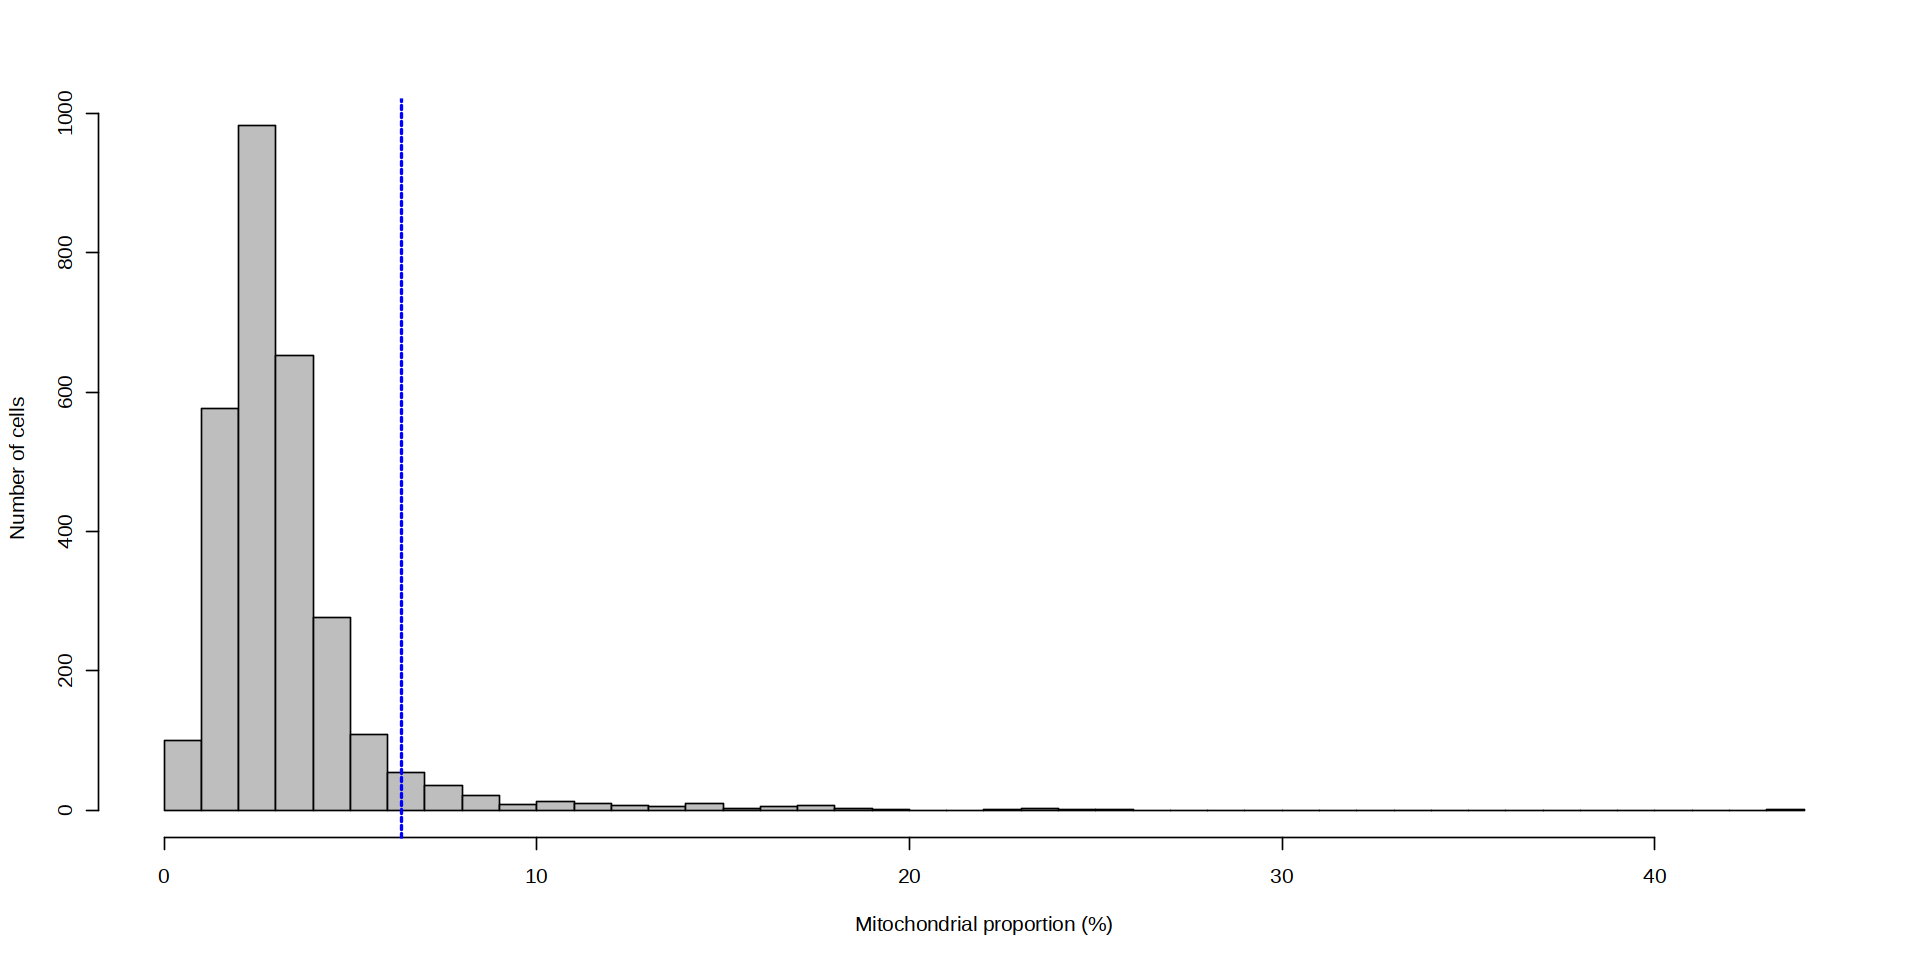

In [33]:
mito.drop <- isOutlier(sce$subsets_Mito_percent, nmads = 3)

max.mito <- median(sce$subsets_Mito_percent) + 3*mad(sce$subsets_Mito_percent)

hist(sce$subsets_Mito_percent, xlab = "Mitochondrial proportion (%)",
     ylab = "Number of cells",
     breaks = 40, main = "", col = "grey")

abline(v = max.mito, col = "blue", lwd = 2, lty = 2)

In [34]:
sceQC <- sce[,!(libsize.drop | feature.drop | mito.drop)]
data.frame(ByLibrarySize = sum(libsize.drop), ByFeature = sum(feature.drop), ByMito = sum(mito.drop),
           Remaining = ncol(sceQC))

ByLibrarySize,ByFeature,ByMito,Remaining
<int>,<int>,<int>,<int>
108,1,158,2618


In [25]:
sceQC <- sce[,!(libsize.drop | feature.drop | mito.drop)]
data.frame(ByLibrarySize = sum(libsize.drop), ByFeature = sum(feature.drop), ByMito = sum(mito.drop),
           Remaining = ncol(sceQC))

ByLibrarySize,ByFeature,ByMito,Remaining
<int>,<int>,<int>,<int>
0,1,158,2726


**Filtering out low-abundance genes**

Low-abundance genes are problematic as zero or near-zero counts do not contain enough information for
reliable statsitical inference. Here, low-abundance genes are defined as those with an average count below a
filter threshold of 0.001 (Davie et al., 2018). Removal of these genes mitigates discreteness and reduces the
amount of computational work without major (if any) loss of information.

In [40]:
average.counts <- calculateAverage(sceQC, exprs_values = "counts",
                                   subset_row = NULL)
genes.to.keep <- average.counts >= 0.001
sum(genes.to.keep)

[1] 17454

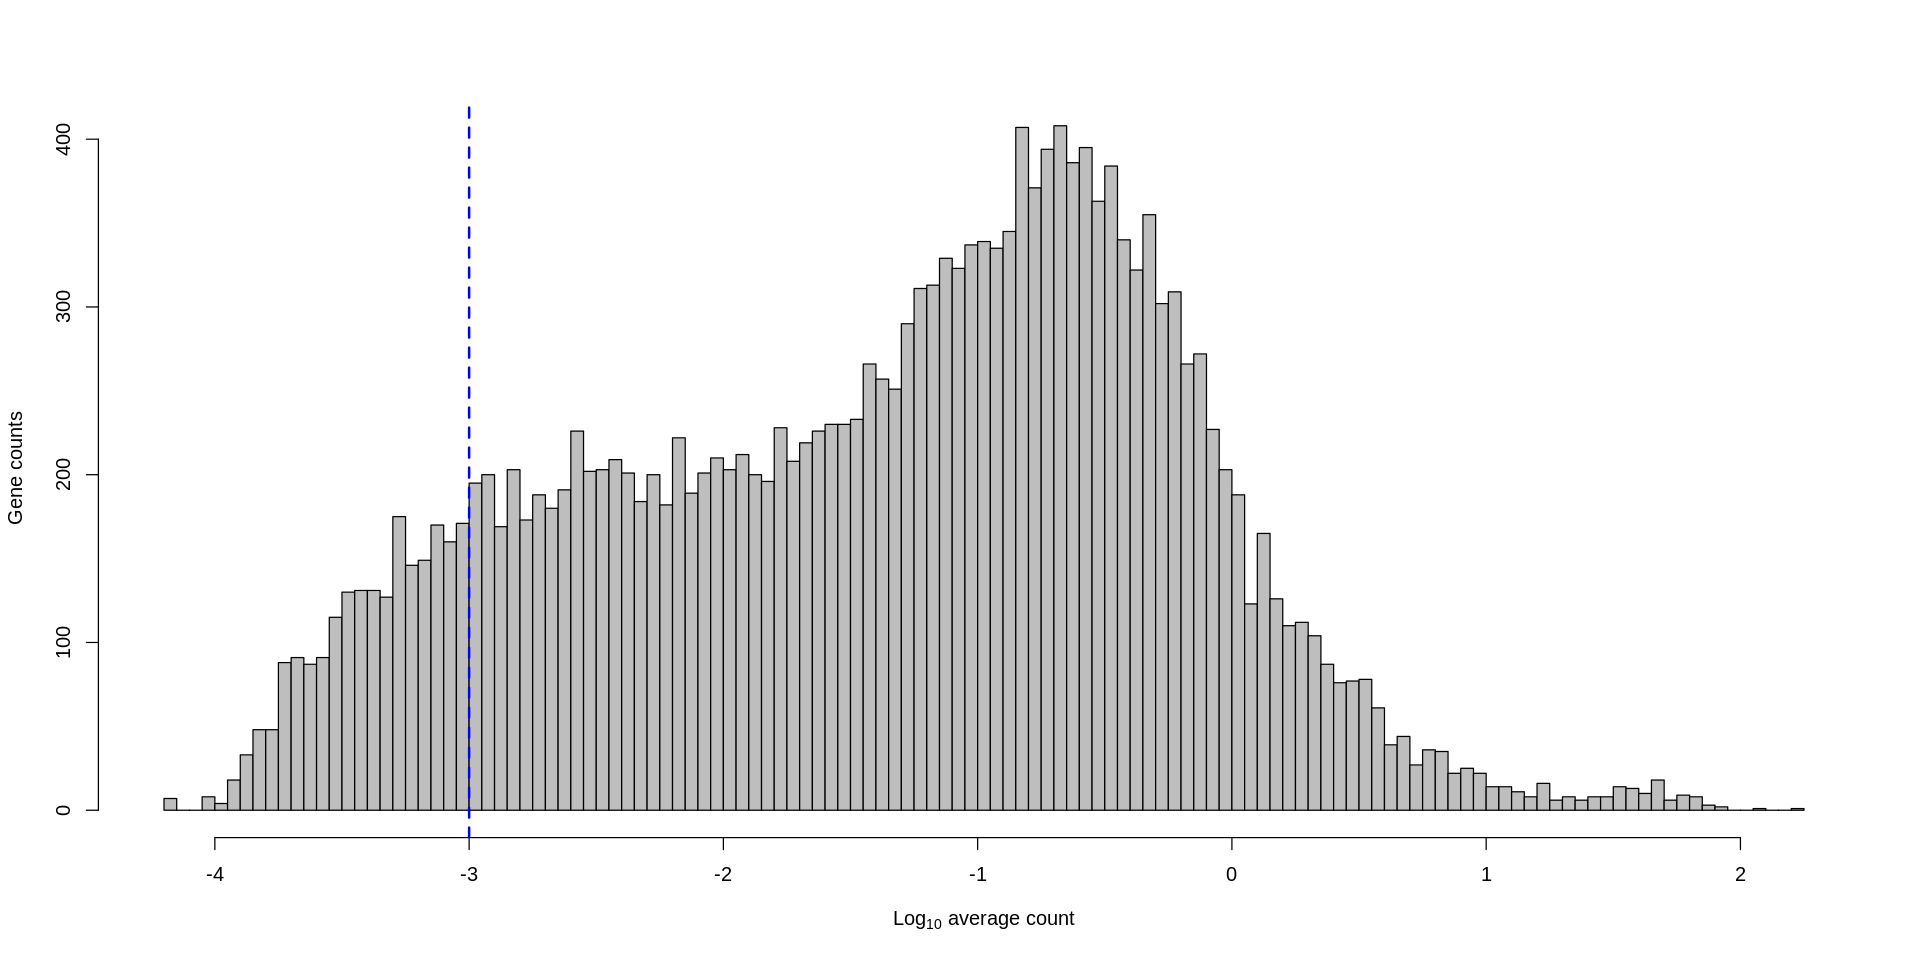

In [41]:
hist(log10(average.counts), breaks = 100, main = "", col = "grey",
     xlab = expression(Log[10]~"average count"), ylab = "Gene counts")
abline(v = log10(0.001), col = "blue", lwd = 2, lty = 2)

Apply the mean-based filter to the data by subsetting the `SingleCellExperiment` object.

In [42]:
sce <- sceQC[genes.to.keep,]
dim(sce)

[1] 17454  2726

**Duplicate removal**

In [43]:
sce <- sce[!duplicated(rownames(sce)),]
dim(sce)

[1] 17454  2726

#### Convert single cell object to Seurat object

In [44]:
seuratObject <- as.Seurat(sce)
seuratObject

An object of class Seurat 
17454 features across 2726 samples within 1 assay 
Active assay: RNA (17454 features, 0 variable features)

In [45]:
saveRDS(seuratObject, file = "./RDataSessions/E13_5_SeuratObject.Rds")

### Timepoint E15_5<a id="6"></a>

#### Convert Seurat object to single cell object

In [46]:
sce <- as.SingleCellExperiment(E15_5)

In [47]:
is.mito <- grepl("^mt-", rownames(sce))
mito.list <-  grep("^mt-", rownames(sce), value = TRUE)

In [48]:
is.spike <- grepl("^gSpikein", rownames(sce))
spike.list <- grep("^gSpikein", rownames(sce), value = TRUE)

In [49]:
celldata <- perCellQCMetrics(sce, subsets = list(Mt = is.mito, ERCC = is.spike))

In [50]:
sce <- addPerCellQC(sce, subsets=list(Mito = is.mito, ERCC = is.spike))
colnames(colData(sce))

[1] "orig.ident"            "nCount_RNA"            "nFeature_RNA"         
 [4] "geo_accession"         "tissue"                "organism"             
 [7] "strain"                "developmental_stage"   "instrument_model"     
[10] "technology"            "ident"                 "sum"                  
[13] "detected"              "subsets_Mito_sum"      "subsets_Mito_detected"
[16] "subsets_Mito_percent"  "subsets_ERCC_sum"      "subsets_ERCC_detected"
[19] "subsets_ERCC_percent"  "total"

**QC of the cells by feature number and library size**

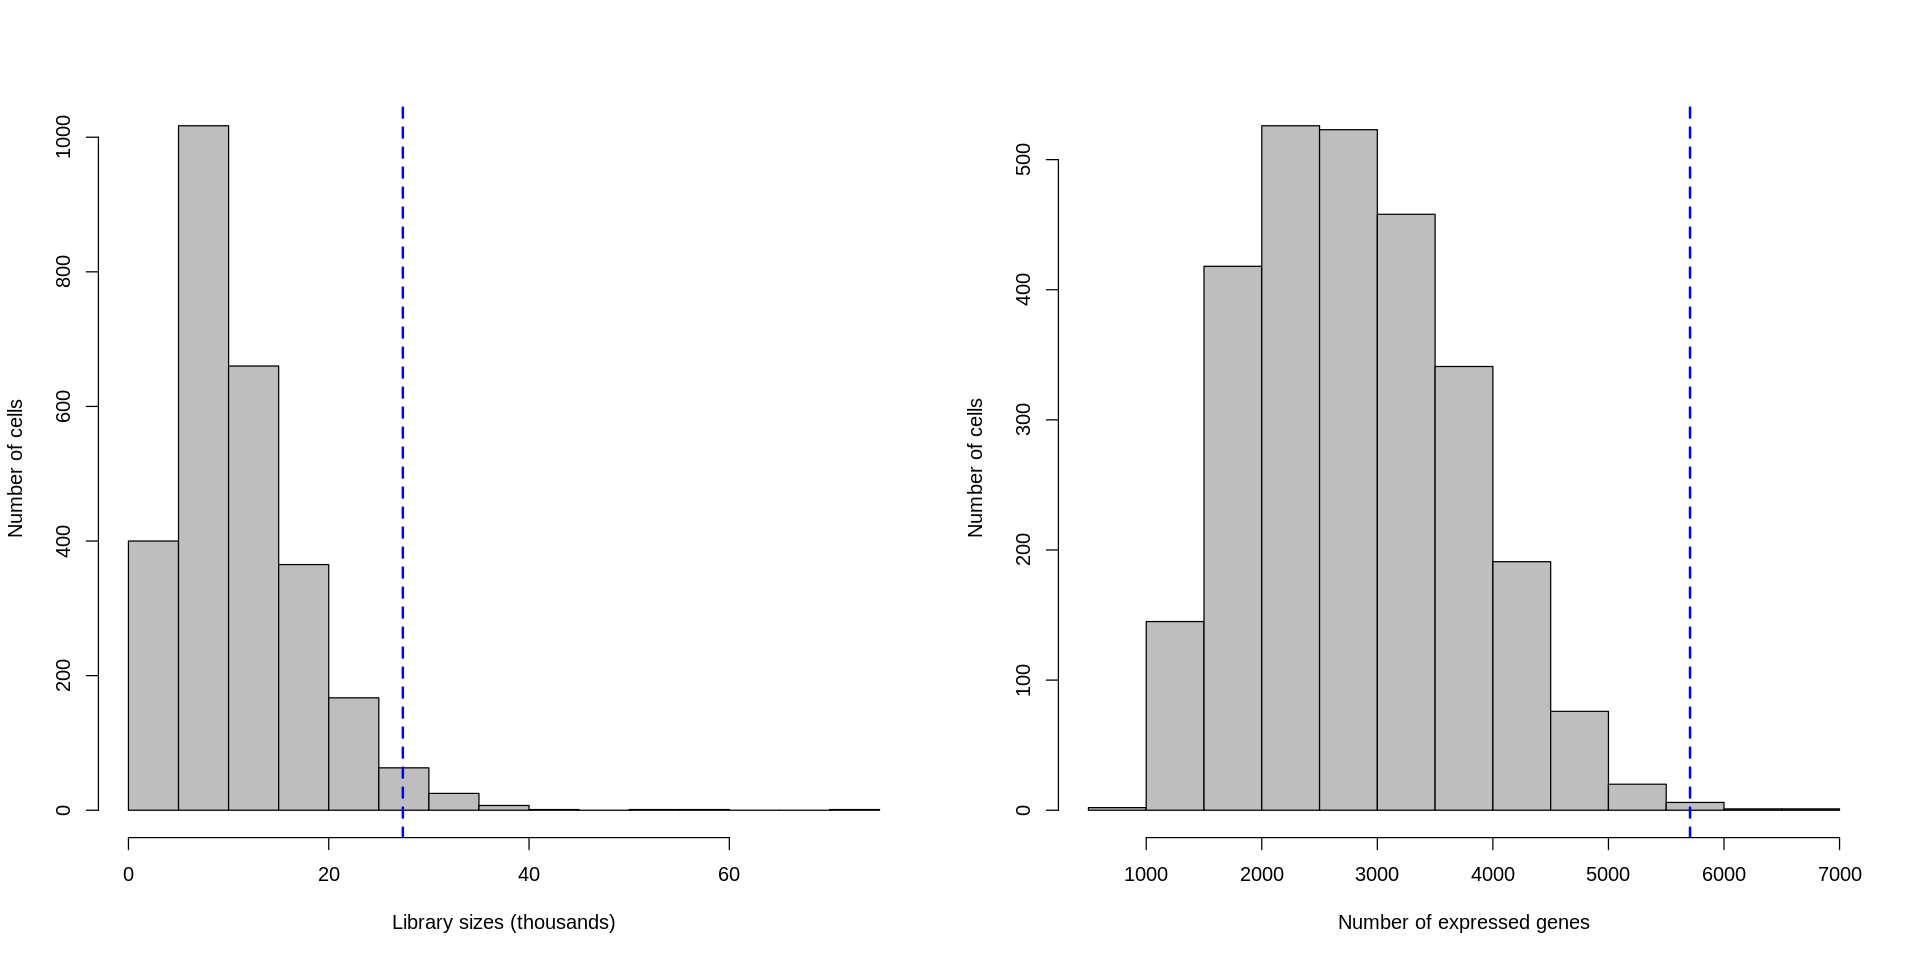

In [51]:
libsize.drop <- isOutlier(sce$sum, nmads = 3, type = "both", log = TRUE)
feature.drop <- isOutlier(sce$detected, nmads = 3, type = "both", log = TRUE)

# libsize.drop cutoff values
min.libsize <- (median(sce$sum) - 3*mad(sce$sum))/1e3
max.libsize <- (median(sce$sum) + 3*mad(sce$sum))/1e3

# feature.drop cutoff values
min.features <- (median(sce$detected) - 3*mad(sce$detected))
max.features <- (median(sce$detected) + 3*mad(sce$detected))

par(mfrow = c(1,2))

hist(sce$sum/1e3, xlab = "Library sizes (thousands)", main = "", breaks = 20,
     col = "grey", ylab = "Number of cells")

abline(v = min.libsize, col = "blue", lwd = 2, lty = 2)
abline(v = max.libsize, col = "blue", lwd = 2, lty = 2)

hist(sce$detected, xlab = "Number of expressed genes", main = "", breaks = 20,
     col = "grey", ylab = "Number of cells")

abline(v = min.features, col = "blue", lwd = 2, lty = 2)
abline(v = max.features, col = "blue", lwd = 2, lty = 2)

**Proportion of mitochondrial reads**

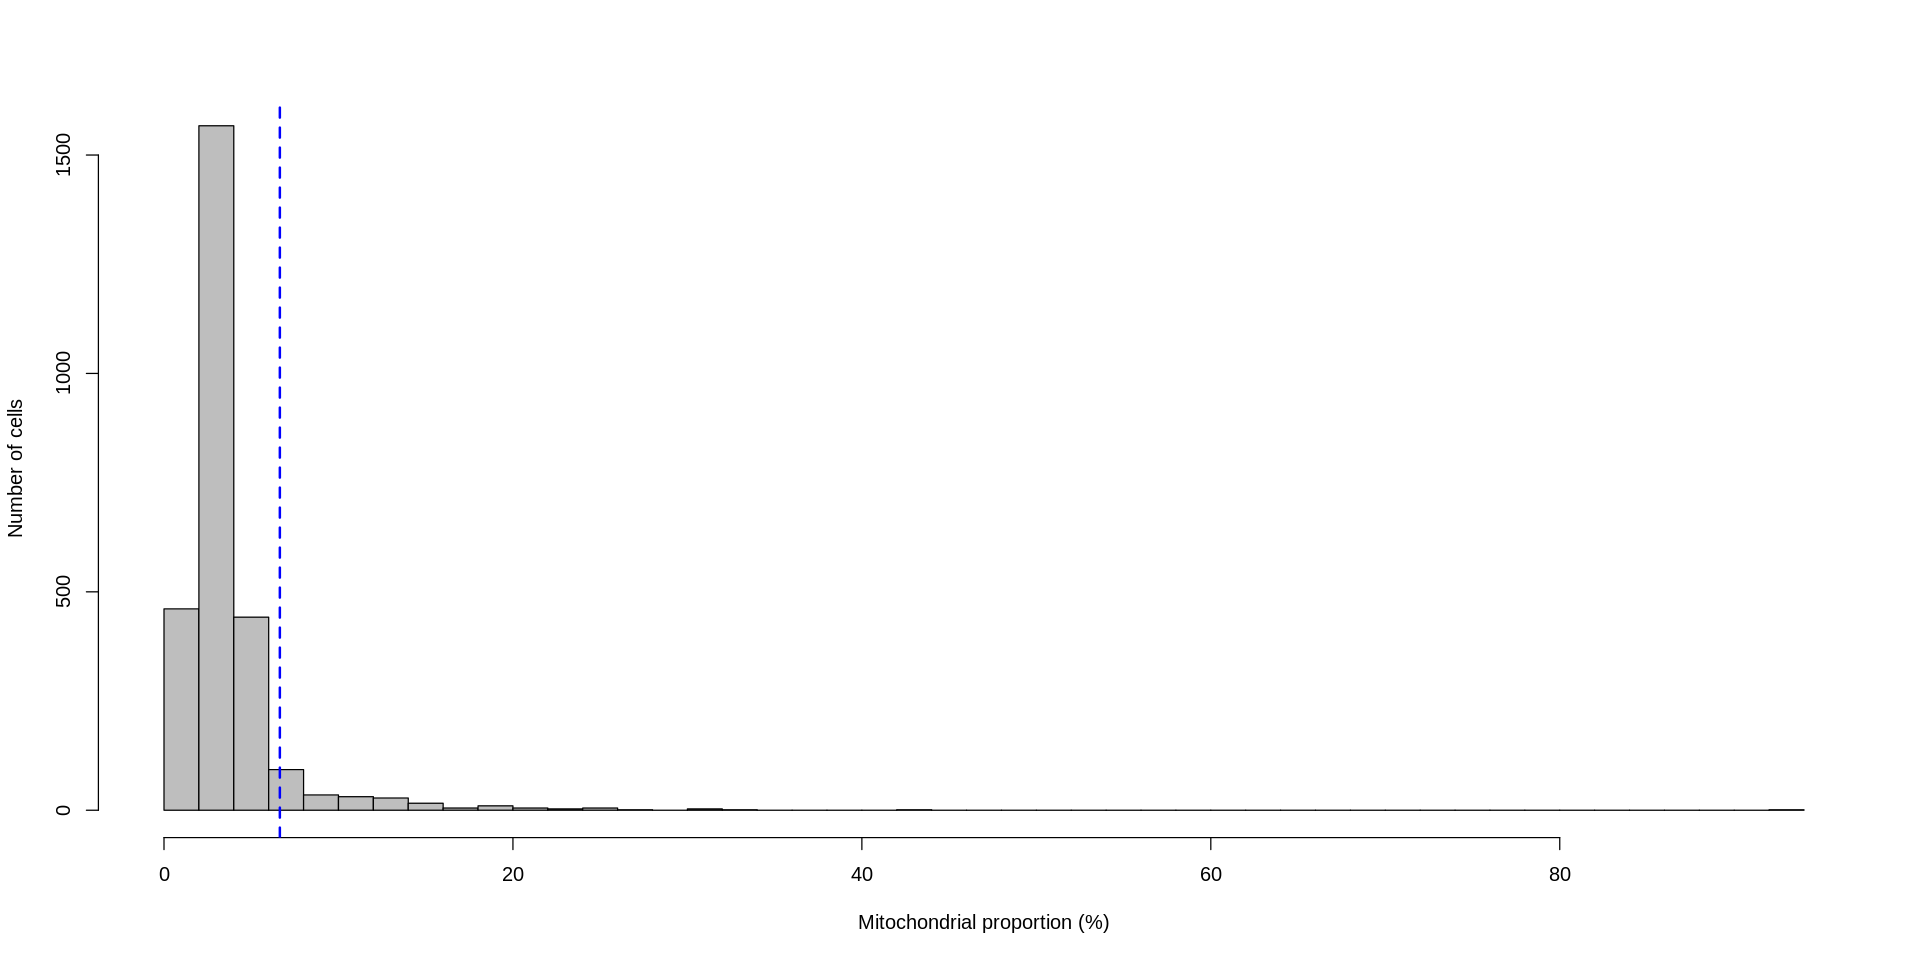

In [52]:
mito.drop <- isOutlier(sce$subsets_Mito_percent, nmads = 3)

max.mito <- median(sce$subsets_Mito_percent) + 3*mad(sce$subsets_Mito_percent)

hist(sce$subsets_Mito_percent, xlab = "Mitochondrial proportion (%)",
     ylab = "Number of cells",
     breaks = 40, main = "", col = "grey")

abline(v = max.mito, col = "blue", lwd = 2, lty = 2)

In [53]:
sceQC <- sce[,!(libsize.drop | feature.drop | mito.drop)]
data.frame(ByLibrarySize = sum(libsize.drop), ByFeature = sum(feature.drop), ByMito = sum(mito.drop),
           Remaining = ncol(sceQC))

ByLibrarySize,ByFeature,ByMito,Remaining
<int>,<int>,<int>,<int>
1,1,198,2509


**Filtering out low-abundance genes**

Low-abundance genes are problematic as zero or near-zero counts do not contain enough information for
reliable statsitical inference. Here, low-abundance genes are defined as those with an average count below a
filter threshold of 0.001 (Davie et al., 2018). Removal of these genes mitigates discreteness and reduces the
amount of computational work without major (if any) loss of information.

In [54]:
average.counts <- calculateAverage(sceQC, exprs_values = "counts",
                                   subset_row = NULL)
genes.to.keep <- average.counts >= 0.001
sum(genes.to.keep)

[1] 17578

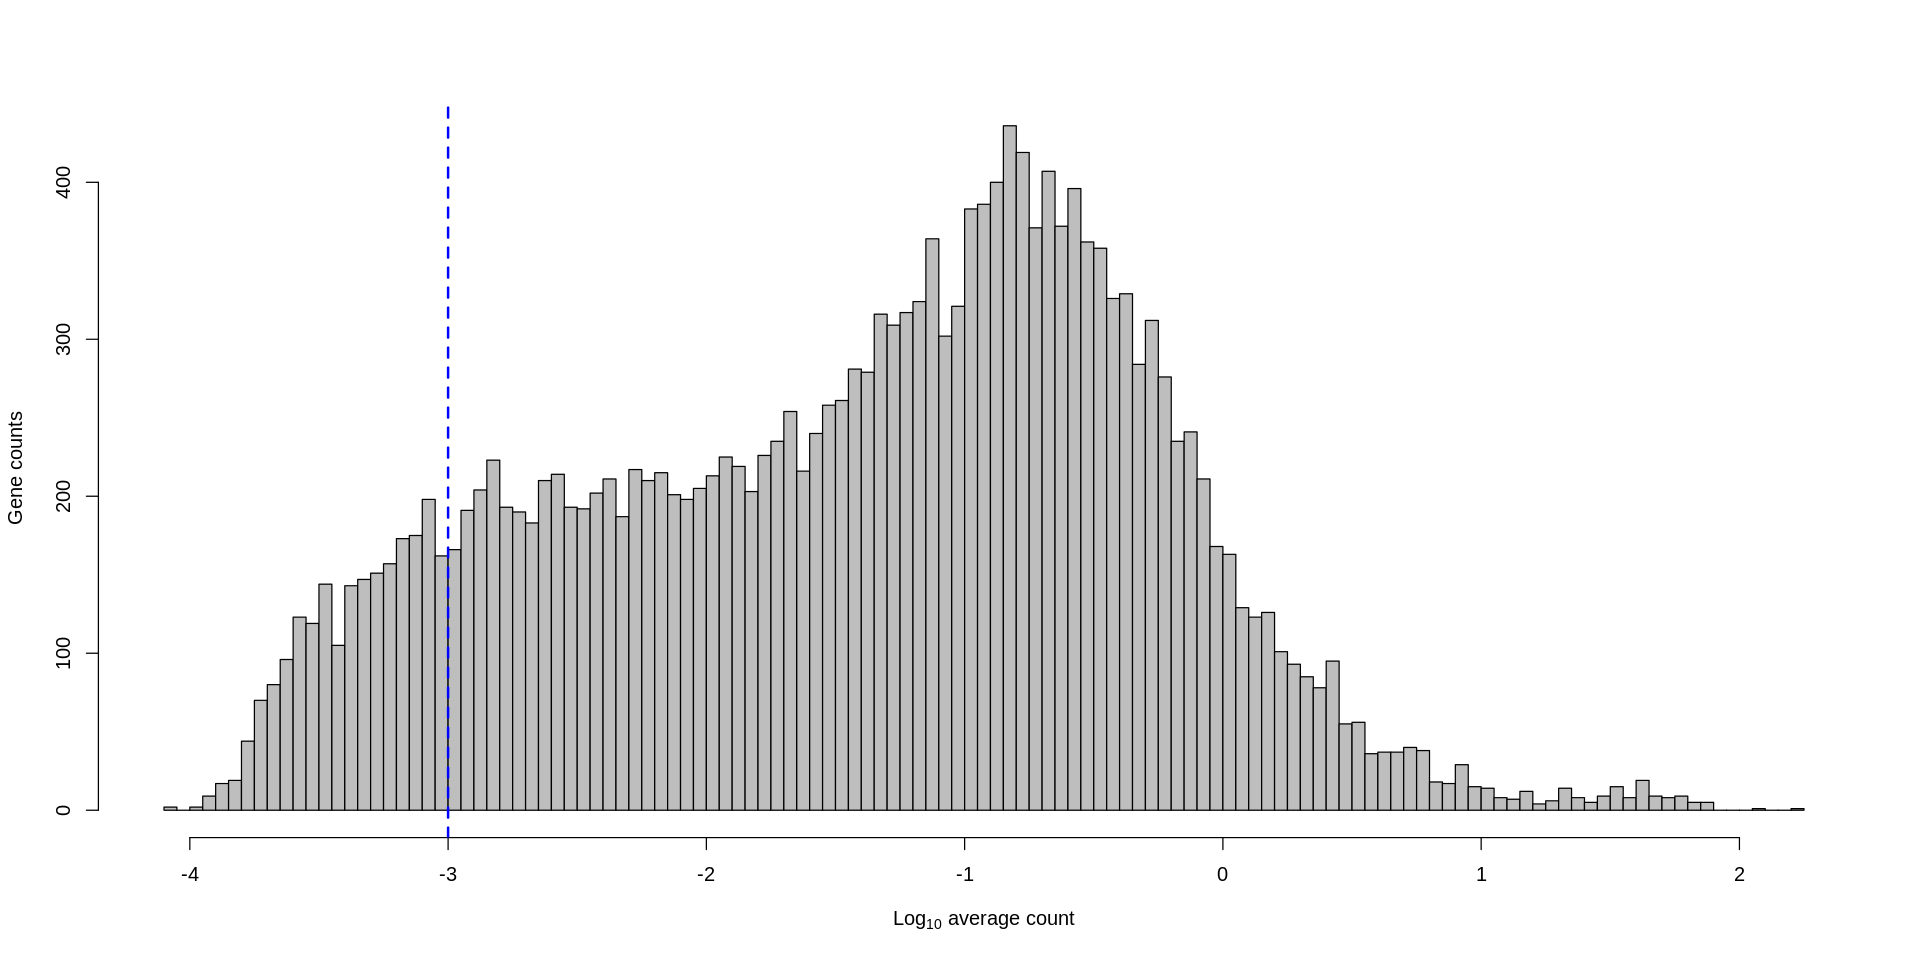

In [55]:
hist(log10(average.counts), breaks = 100, main = "", col = "grey",
     xlab = expression(Log[10]~"average count"), ylab = "Gene counts")
abline(v = log10(0.001), col = "blue", lwd = 2, lty = 2)

Apply the mean-based filter to the data by subsetting the `SingleCellExperiment` object.

In [56]:
sce <- sceQC[genes.to.keep,]
dim(sce)

[1] 17578  2509

**Duplicate removal**

In [57]:
sce <- sce[!duplicated(rownames(sce)),]
dim(sce)

[1] 17578  2509

#### Convert single cell object to Seurat object

In [58]:
seuratObject <- as.Seurat(sce)
seuratObject

An object of class Seurat 
17578 features across 2509 samples within 1 assay 
Active assay: RNA (17578 features, 0 variable features)

In [59]:
saveRDS(seuratObject, file = "./RDataSessions/E15_5_SeuratObject.Rds")

### Timepoint E18_5<a id="7"></a>

#### Convert Seurat object to single cell object

In [60]:
sce <- as.SingleCellExperiment(E18_5)

In [61]:
is.mito <- grepl("^mt-", rownames(sce))
mito.list <-  grep("^mt-", rownames(sce), value = TRUE)

In [62]:
is.spike <- grepl("^gSpikein", rownames(sce))
spike.list <- grep("^gSpikein", rownames(sce), value = TRUE)

In [63]:
celldata <- perCellQCMetrics(sce, subsets = list(Mt = is.mito, ERCC = is.spike))

In [64]:
sce <- addPerCellQC(sce, subsets=list(Mito = is.mito, ERCC = is.spike))
colnames(colData(sce))

[1] "orig.ident"            "nCount_RNA"            "nFeature_RNA"         
 [4] "geo_accession"         "tissue"                "organism"             
 [7] "strain"                "developmental_stage"   "instrument_model"     
[10] "technology"            "ident"                 "sum"                  
[13] "detected"              "subsets_Mito_sum"      "subsets_Mito_detected"
[16] "subsets_Mito_percent"  "subsets_ERCC_sum"      "subsets_ERCC_detected"
[19] "subsets_ERCC_percent"  "total"

**QC of the cells by feature number and library size**

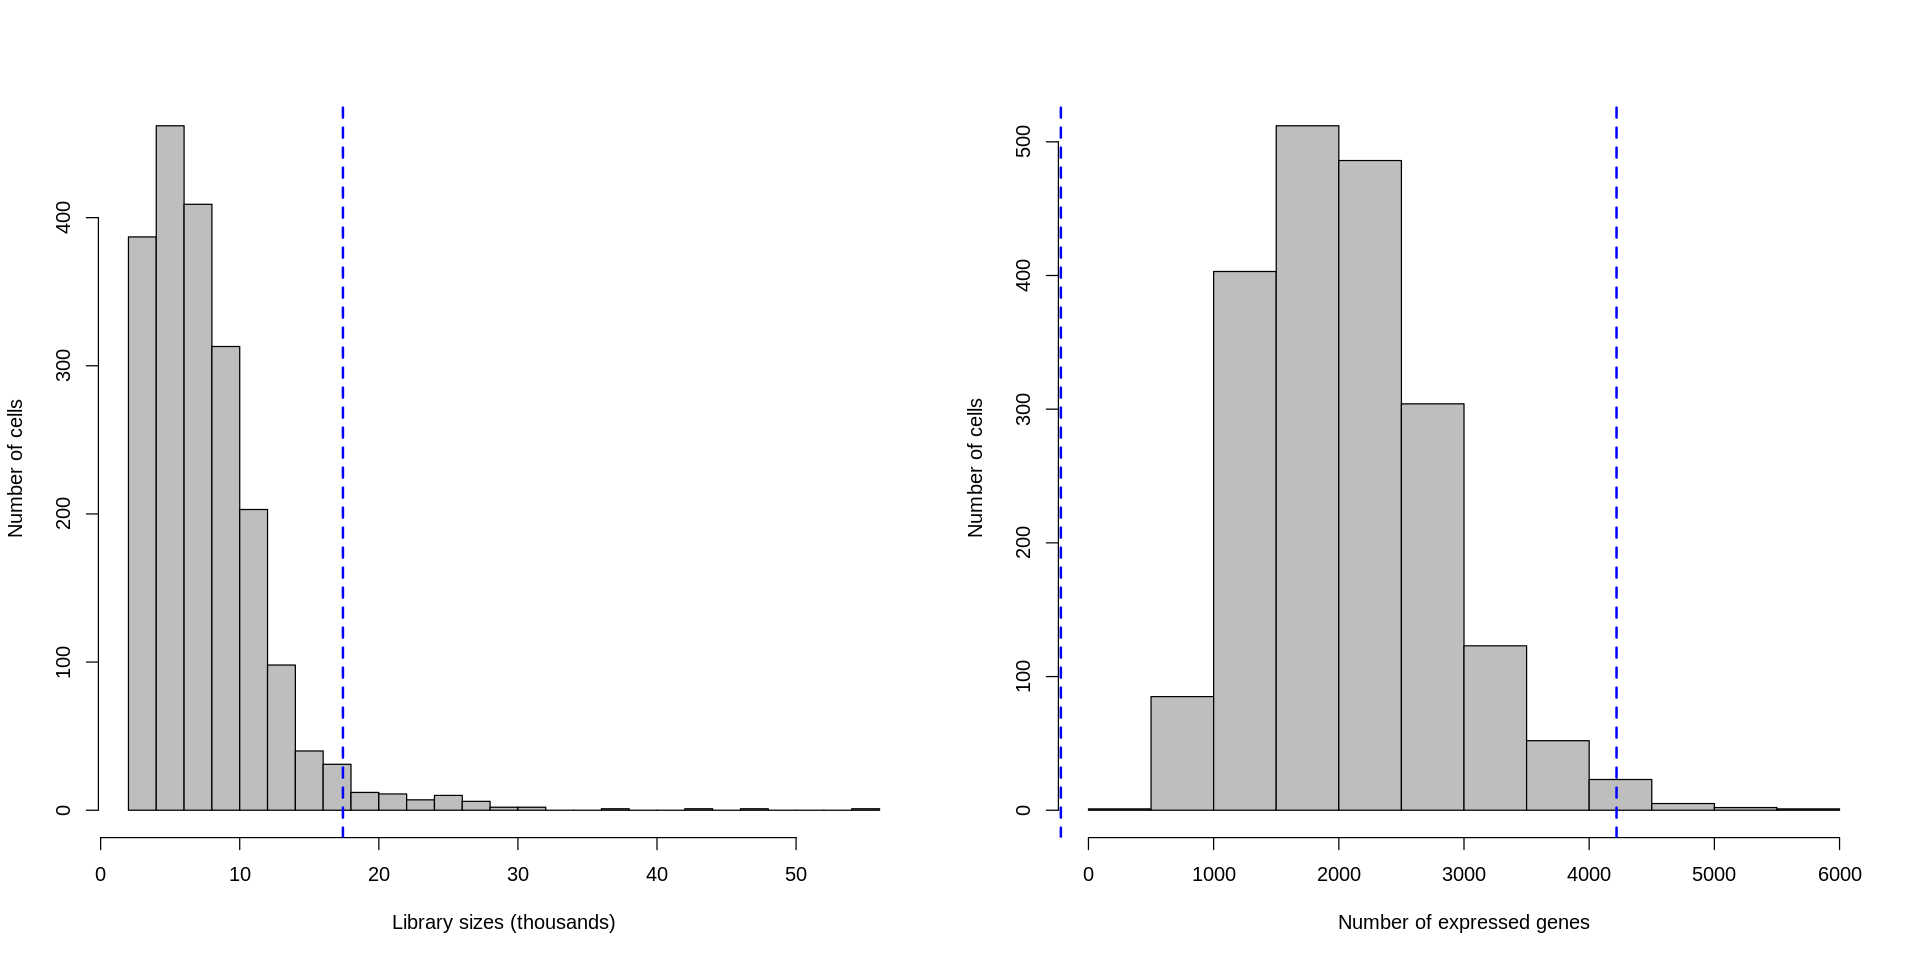

In [65]:
libsize.drop <- isOutlier(sce$sum, nmads = 3, type = "both", log = TRUE)
feature.drop <- isOutlier(sce$detected, nmads = 3, type = "both", log = TRUE)

# libsize.drop cutoff values
min.libsize <- (median(sce$sum) - 3*mad(sce$sum))/1e3
max.libsize <- (median(sce$sum) + 3*mad(sce$sum))/1e3

# feature.drop cutoff values
min.features <- (median(sce$detected) - 3*mad(sce$detected))
max.features <- (median(sce$detected) + 3*mad(sce$detected))

par(mfrow = c(1,2))

hist(sce$sum/1e3, xlab = "Library sizes (thousands)", main = "", breaks = 20,
     col = "grey", ylab = "Number of cells")

abline(v = min.libsize, col = "blue", lwd = 2, lty = 2)
abline(v = max.libsize, col = "blue", lwd = 2, lty = 2)

hist(sce$detected, xlab = "Number of expressed genes", main = "", breaks = 20,
     col = "grey", ylab = "Number of cells")

abline(v = min.features, col = "blue", lwd = 2, lty = 2)
abline(v = max.features, col = "blue", lwd = 2, lty = 2)

**Proportion of mitochondrial reads**

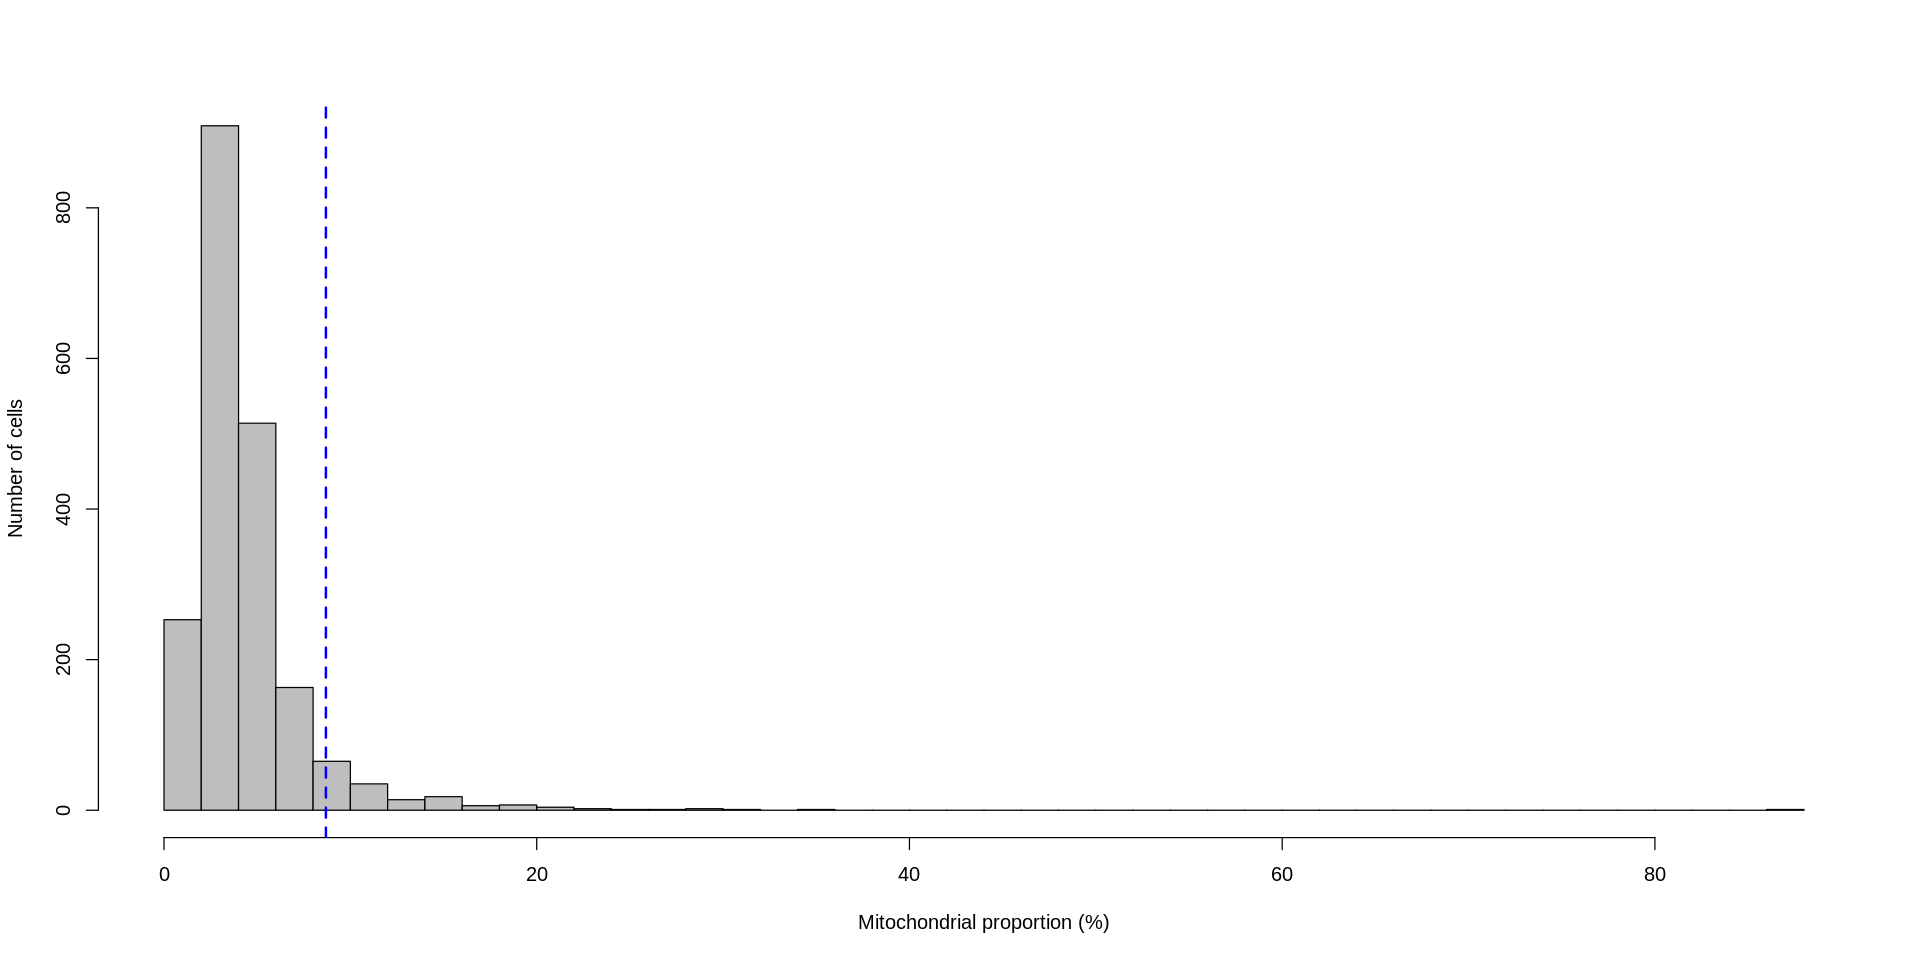

In [66]:
mito.drop <- isOutlier(sce$subsets_Mito_percent, nmads = 3)

max.mito <- median(sce$subsets_Mito_percent) + 3*mad(sce$subsets_Mito_percent)

hist(sce$subsets_Mito_percent, xlab = "Mitochondrial proportion (%)",
     ylab = "Number of cells",
     breaks = 40, main = "", col = "grey")

abline(v = max.mito, col = "blue", lwd = 2, lty = 2)

In [67]:
sceQC <- sce[,!(libsize.drop | feature.drop | mito.drop)]
data.frame(ByLibrarySize = sum(libsize.drop), ByFeature = sum(feature.drop), ByMito = sum(mito.drop),
           Remaining = ncol(sceQC))

ByLibrarySize,ByFeature,ByMito,Remaining
<int>,<int>,<int>,<int>
4,3,132,1861


**Filtering out low-abundance genes**

Low-abundance genes are problematic as zero or near-zero counts do not contain enough information for
reliable statsitical inference. Here, low-abundance genes are defined as those with an average count below a
filter threshold of 0.001 (Davie et al., 2018). Removal of these genes mitigates discreteness and reduces the
amount of computational work without major (if any) loss of information.

In [68]:
average.counts <- calculateAverage(sceQC, exprs_values = "counts",
                                   subset_row = NULL)
genes.to.keep <- average.counts >= 0.001
sum(genes.to.keep)

[1] 17097

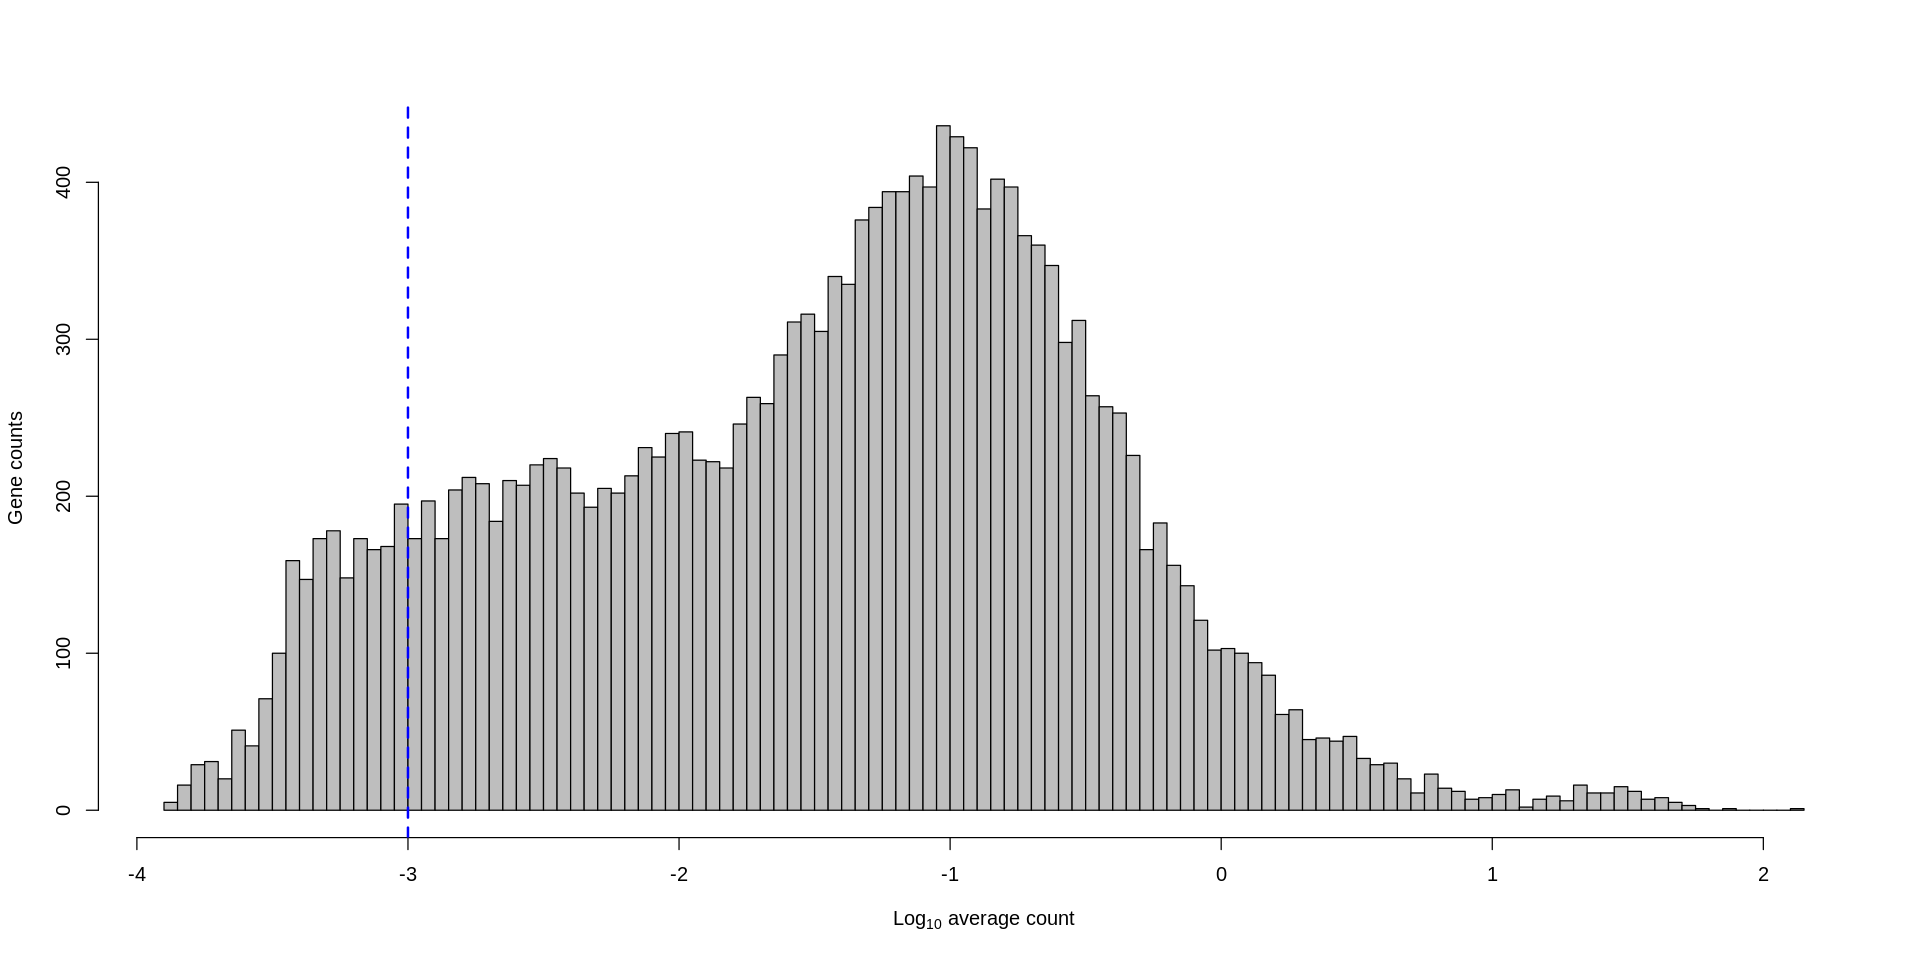

In [69]:
hist(log10(average.counts), breaks = 100, main = "", col = "grey",
     xlab = expression(Log[10]~"average count"), ylab = "Gene counts")
abline(v = log10(0.001), col = "blue", lwd = 2, lty = 2)

Apply the mean-based filter to the data by subsetting the `SingleCellExperiment` object.

In [70]:
sce <- sceQC[genes.to.keep,]
dim(sce)

[1] 17097  1861

**Duplicate removal**

In [71]:
sce <- sce[!duplicated(rownames(sce)),]
dim(sce)

[1] 17097  1861

#### Convert single cell object to Seurat object

In [72]:
seuratObject <- as.Seurat(sce)
seuratObject

An object of class Seurat 
17097 features across 1861 samples within 1 assay 
Active assay: RNA (17097 features, 0 variable features)

In [73]:
saveRDS(seuratObject, file = "./RDataSessions/E18_5_SeuratObject.Rds")